**Using this template**

1. Change notebook title to assignment title you working on, eg. `Graded Challenge 1 or Milestone 1`
2. Put your identity such as name and batch number below notebook title.
3. Write your description before do any work. State your purpose of this assignment and what you are trying to achieve. 
4. Look at the rubric of this assignment and make sure you understand the criteria.
5. Code your solution in the cell provided below the working area section.
6. State your conlusions, findings, and any other relevant information in the cell provided below the conclusions sections.
7. Save this notebook and rename it to assignment title you working on  eg. `Graded Challenge 1 or Milestone 1`
8. Push your assignment before deadline.
9. Good Luck!

# I. Perkenalan

## 1.1. Perkenalan

### Graded Challenge 4 - P1

- Name   : Nabila Edelliana Khairunnisa
- Batch  : 011

### Description
Project tugas ini bertujuan untuk mendalami lebih lanjut dasar-dasar data science khususnya konsep Clustering.

Data yang di olah merupakan data informasi penggunaan kartu kredit selama 6 bulan terakhir dengan keterangan sebagai berikut.
- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Total amount of money that you owe to your credit card company
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFF_PURCHASES_FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASES_INSTALLMENTS_FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASH_ADVANCE_FREQUENCY : How frequently the cash in advance being paid
- CASH_ADVANCE_TRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRC_FULL_PAYMENT : Percent of full payment paid by user
- TENURE: Tenure of credit card service for user


### Objective
1. Mampu memperoleh data menggunakan BigQuery
2. Mampu mempersiapkan data untuk digunakan dalam Clustering
3. Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
4. Mampu mengimplementasikan Clustering pada data yang diberikan

### Problem Statement
1. Manakah algortima machine learning terbaik untuk dataset ini?
2. Bagaimanakah hyperparameter terbaik dari algoritma terbaik untuk dataset ini?
3. Bagaimana hasil segmentasi customer dengan algoritma terbaik?

## 1.2. Query dari BigQuery

select *
from `ftds-hacktiv8-project.phase1_assignments.credit-card-information`
where mod(CUST_ID,2) <> 0;

## Working Area

```txt
Put your code, analysis, everything below this line

Make sure to check everything the rubric requires before you submit
```

# II. Import Pustaka yang Dibutuhkan

In [1]:
# Library EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Library pre-processing
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA

# Library Model Machine Learning
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Library Evaluasi Model
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# III. Data Loading

In [2]:
data = pd.read_csv('h8dsft_P1G4_Nabila_Edelliana_K.csv')
# Menampilkan head data
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [3]:
# Menampilkan tail data
data.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,2345,9629.808851,1.0,0.0,0.0,0.0,4372.393835,0.000000,0.000000,0.0,0.545455,9,0,12000.0,2468.988022,2134.295731,0.0,11
4471,6785,1040.030221,1.0,0.0,0.0,0.0,1390.648290,0.000000,0.000000,0.0,0.545455,18,0,1400.0,290.129620,287.994171,0.0,11
4472,7347,1322.818587,1.0,0.0,0.0,0.0,762.301096,0.000000,0.000000,0.0,0.545455,11,0,1500.0,1035.627320,312.835530,0.0,11
4473,8447,1060.391273,1.0,0.0,0.0,0.0,1475.858013,0.000000,0.000000,0.0,0.545455,10,0,2000.0,407.360560,277.084736,0.0,11
4474,1995,3447.674222,1.0,205.0,205.0,0.0,4548.057776,0.090909,0.090909,0.0,0.545455,7,1,10500.0,665.239171,817.844662,0.0,11


In [4]:
# Membuat salinan data untuk backup
data_copy = data.copy()

In [5]:
# mengecek ukuran dataset
data.shape

(4475, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

# IV. Exploratory Data Analysis (EDA)

## 4.1. Melihat missing value

In [7]:
# Melihat data yang memiliki missing value
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

terdapat missing values sebanyak 155 data pada kolom `MINIMUM_PAYMENTS`

In [8]:
# menyalin data lagi untuk berjaga-jaga
df_new = data.copy()
df_new.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [9]:
df_new[df_new['MINIMUM_PAYMENTS'].isna()]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3091,3.833185,0.125000,45.00,45.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,500.0,0.000000,NaN,0.0,8
1,5069,0.000000,0.000000,176.03,176.03,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,7000.0,0.000000,NaN,0.0,8
6,8629,0.228572,0.125000,60.00,60.00,0.0,0.000000,0.125,0.125,0.0,0.000000,0,1,1500.0,438.738982,NaN,0.0,8
21,883,1464.324632,1.000000,1174.39,1174.39,0.0,0.000000,0.250,0.250,0.0,0.000000,0,8,9000.0,0.000000,NaN,0.0,12
25,1173,16.887571,0.363636,1083.00,1083.00,0.0,0.000000,0.250,0.250,0.0,0.000000,0,3,1200.0,3905.430817,NaN,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,2693,19.949534,0.111111,0.00,0.00,0.0,326.731167,0.000,0.000,0.0,0.111111,5,0,2500.0,0.000000,NaN,0.0,9
4272,2813,0.000000,0.000000,0.00,0.00,0.0,253.887233,0.000,0.000,0.0,0.111111,1,0,500.0,2437.932505,NaN,0.0,9
4274,3943,8.187263,0.111111,0.00,0.00,0.0,793.848237,0.000,0.000,0.0,0.111111,1,0,1350.0,0.000000,NaN,0.0,9
4276,5999,25.998899,0.111111,0.00,0.00,0.0,466.387778,0.000,0.000,0.0,0.111111,1,0,4000.0,0.000000,NaN,0.0,9


Berdasarkan tabel diatas dapat dilihat bahwa ternyata `MINIMUM_PAYMENTS` yang null adalah orang-orang yang tidak melakukan payments maupun orang-orang yang membayar tagihan langsung.

## 4.2. Melihat unique values

In [10]:
data['TENURE'].unique()

array([ 8, 12, 10,  6,  9,  7, 11])

## 4.3. Melihat korelasi setiap kolom

In [11]:
df_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### Melihat korelasi kolom menggunakan heatmap

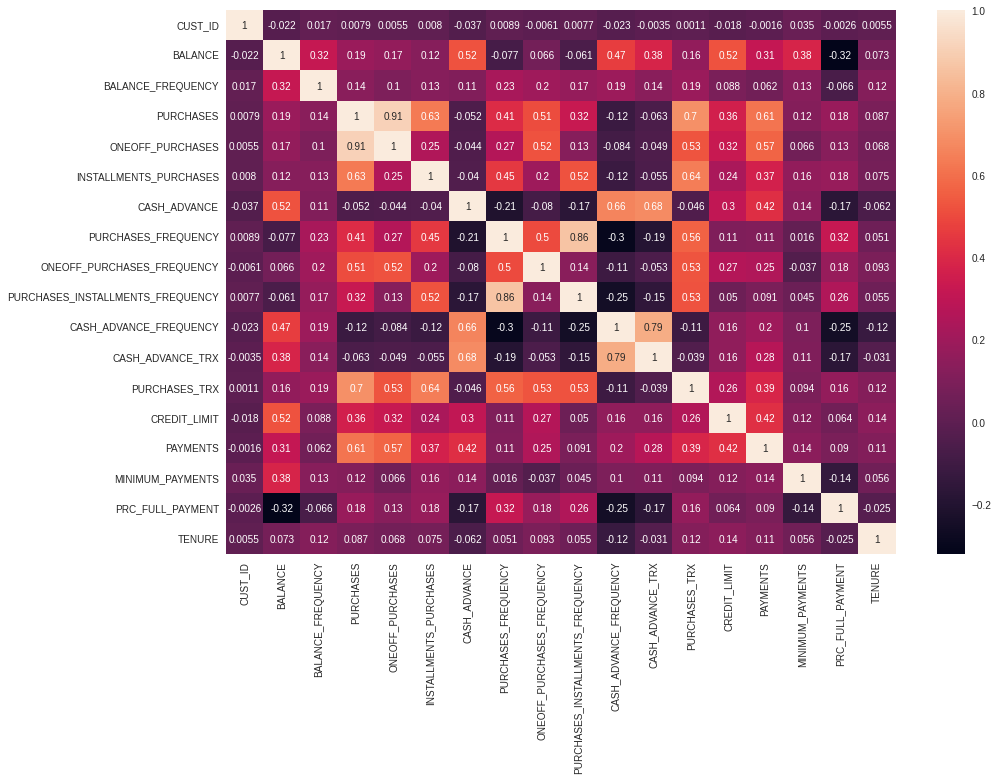

In [12]:
plt.subplots(figsize=(15, 10))
sns.heatmap(df_new.corr(), annot=True)

Apabila dilihat sekilas dari heatmap, dataset ini memiliki cukup banyak korelasi antarkolom.

### Melihat korelasi menggunakan grafik displot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

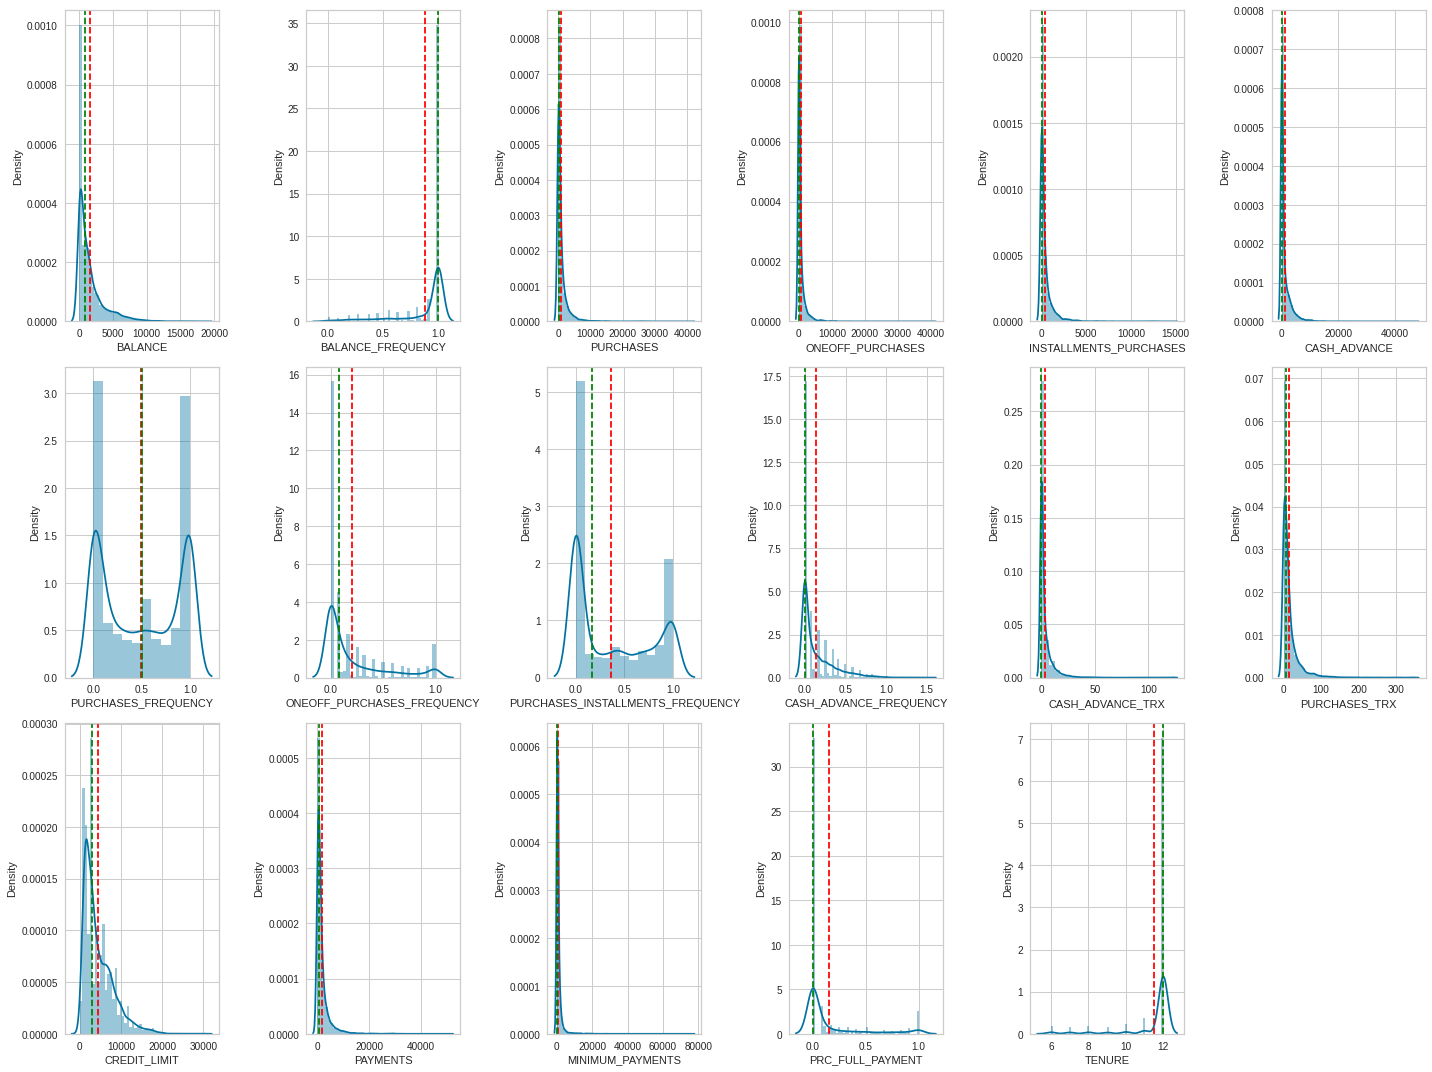

In [13]:
# membuat list kolom numerikal
numeric_columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

# membuat fungsi untuk menampilkan grafik displot
def distplot(df, col, axes):
    sns.distplot(df[col], ax = axes)
    axes.axvline(df[col].mean(), linestyle = '--', color = "red")
    axes.axvline(df[col].median(), linestyle = '--', color = "green")

fig, axes = plt.subplots(3,6, figsize = (20,15))

# menampilkan distplot tiap kolom numerik untuk analisis korelasi
axes = np.ravel(axes)
for i in range(len(numeric_columns)):
    distplot(df_new, numeric_columns[i], axes[i])
for i in range(len(numeric_columns), 3*6):
    axes[i].axis("off")
axes = np.reshape(axes, (3, 6))
plt.tight_layout()
plt.show()

Insight yang dapat diambil dari grafik di atas :
- Apabila dilihat sepintas, dataset ini untuk dataset ini right-skewed.
- **BALANCE** : Kebanyakan customer memiliki besar hutang/kredit yang rendah karena data BALANCE paling banyak berkumpul di nilai 0.
- **BALANCE_FREQUENCY** : Walaupun besar hutang tidak besar, kebanyakan customer tetap melakukan kredit, akan tetapi jika dibandingkan dengan distribusi balance, kebanyakan customer telah membayar hutang mereka kepada bank.
- **PURCHASES, ONEOFF_PURCHASES, dan INSTALLMENTS_PURCHASES** : dari ketiga kolom tersebut, dapat disimpulkan bahwa kebanyakan customer melakukan pembelian dalam jumlah yang rendah (mendekati 0). Akan tetapi, jika dilihat dari frekuensinya, kebanyakan customer bisa dikatakan imbang dalam tidak melakukan pembelian dan melakukan pembelian.
- **CASH_ADVANCE_FREQUENCY** : Bila dibandingkan dengan OneOff dan installments purchases, tidak banyak customer yang melakukan pembelian dengan cash.
- **CREDIT LIMIT** : Kebanyakan customer memiliki batas kredit yang rendah. Hal tersebut sesuai dengan grafik mengenai Balance dan analisis sebelumnya dimana customer menjaga saldo kredit mereka untuk tetap rendah.
- Kolom-kolom tersebut memengaruhi satu sama lain sehingga bersifat dependen.

Saya ingin mengetahui, dari beberapa cara pembayaran kredit, manakah yang paling banyak diminati customer.

Text(0.5, 0, 'Cash Purchases')

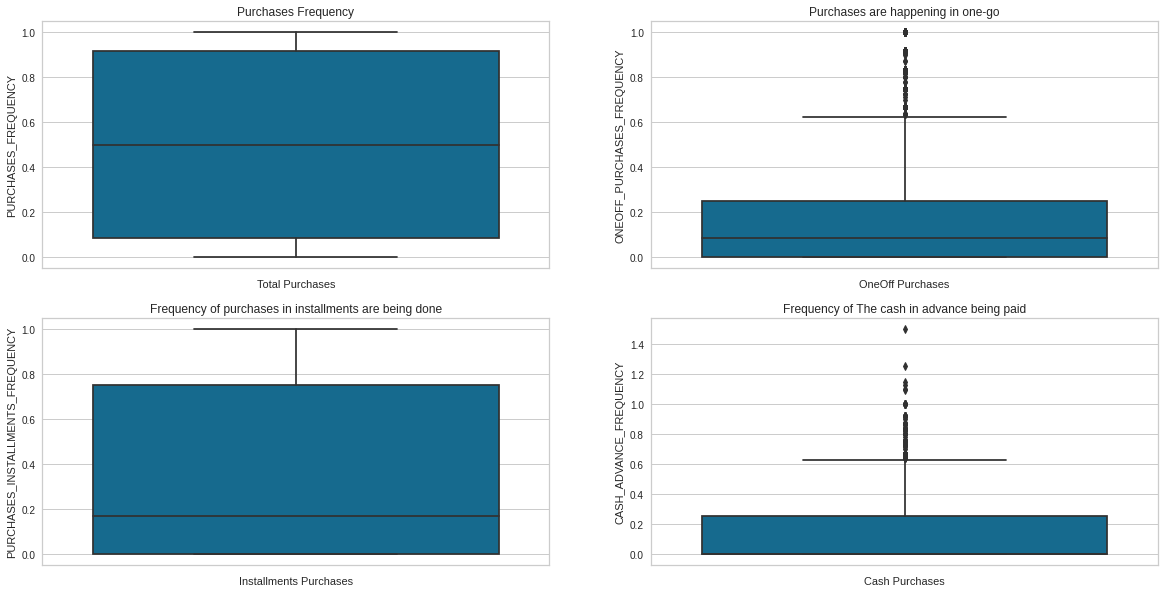

In [14]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.boxplot(y=df_new['PURCHASES_FREQUENCY'])
plt.title('Purchases Frequency')
plt.xlabel('Total Purchases')

plt.subplot(2,2,2)
sns.boxplot(y=df_new['ONEOFF_PURCHASES_FREQUENCY'])
plt.title('Purchases are happening in one-go')
plt.xlabel('OneOff Purchases')

plt.subplot(2,2,3)
sns.boxplot(y=df_new['PURCHASES_INSTALLMENTS_FREQUENCY'])
plt.title('Frequency of purchases in installments are being done')
plt.xlabel('Installments Purchases')

plt.subplot(2,2,4)
sns.boxplot(y=df_new['CASH_ADVANCE_FREQUENCY'])
plt.title('Frequency of The cash in advance being paid')
plt.xlabel('Cash Purchases')

Ternyata pembayaran dengan angsuran/installment lebih banyak diminati oleh customer daripada pembayaran langsung lunas dan cash. Hal itu disimpulkan dari persebaran data yang ditunjukkan boxplot dimana data banyak tersebar di dalam box, dan banyak outlier di OneOff dan Cash Purchases yang menunjukkan bahwa hanya ada beberapa saja yang menyukai metode pembayaran tersebut.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


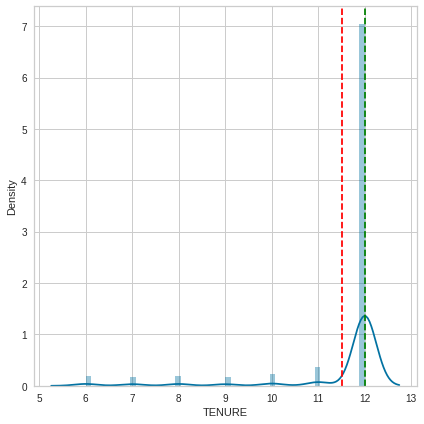

In [15]:
# Melihat distribusi Tenure
fig, axes = plt.subplots(1,1, figsize = (6,6))
sns.distplot(df_new['TENURE'], ax = axes)
axes.axvline(df_new['TENURE'].mean(), linestyle = '--', color = "red")
axes.axvline(df_new['TENURE'].median(), linestyle = '--', color = "green")
axes = np.reshape(axes, (1,1))
plt.legend()
plt.tight_layout()
plt.show()

Dari distplot di atas dapat disimpulkan bahwa kebanyakan customer memilih jangka waktu pembayaran yang lebih lama walaupun kosekuensinya mereka akan membayar bunga yang lebih besar. Saya berasumsi bahwa customer menginginkan jalan yang lebih aman untuk berjaga-jaga apabila mereka tidak bisa membayar hutang dalam waktu yang lebih singkat.

## 4.4. Melihat statistik kolom numerik

In [16]:
df_new[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4475.0,1563.205717,2072.045789,0.000000,124.432849,871.355430,2047.570799,18495.55855
BALANCE_FREQUENCY,4475.0,0.876933,0.238222,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,4475.0,1003.251343,2060.034730,0.000000,39.560000,360.000000,1102.420000,41050.40000
ONEOFF_PURCHASES,4475.0,596.369893,1653.425984,0.000000,0.000000,45.650000,575.220000,40624.06000
INSTALLMENTS_PURCHASES,4475.0,407.110215,880.799744,0.000000,0.000000,88.620000,455.885000,14686.10000
CASH_ADVANCE,4475.0,984.288554,2060.448056,0.000000,0.000000,0.000000,1138.887754,47137.21176
PURCHASES_FREQUENCY,4475.0,0.490579,0.402907,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,4475.0,0.202301,0.298203,0.000000,0.000000,0.083333,0.250000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,4475.0,0.363886,0.397603,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,4475.0,0.136132,0.201036,0.000000,0.000000,0.000000,0.250000,1.50000


Apabila dibandingkan dengan nilai mean, nilai mx semua kolom terlihat jauh lebih besar. Akan tetapi menurut saya data ini natural, karena memang limit balance berbeda-beda setiap orang. Dan seperti yang sudah saya analisis sebelumnya, kolom-kolom di dataset ini dependen sehingga wajar saja jika satu kolom memiliki nilai max yang jauh dari mean, maka kolom lain juga seperti itu.

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

# V. Data Preprocessing

## 5.1. Drop kolom yang tidak dipakai untuk pemodelan

In [18]:
# menampilkan judul kolom dataset
df_new.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [19]:
# menghapus kolom yang tidak digunakan untuk pemodelan
df_new.drop(columns=['CUST_ID'], inplace=True)
df_new.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


## 5.2. Get data for model inference

In [20]:
# Get data for model inference.
# Data inference tidak boleh ada di train dan test. jadi datanya tuh dibagi buat 3 peruntukan.

data_inf = df_new.sample(10, random_state=9)   # ambil 10 sampel, random state gunanya untuk biar ga berubah2, nilainya 9. Nilainya terserah gada pengaruhnya
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1283,341.149186,1.000000,48.78,48.78,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,500.0,256.731955,259.351800,0.000000,12
216,1155.338824,0.909091,5744.03,4055.80,1688.23,0.000000,0.500000,0.083333,0.416667,0.000000,0,11,6000.0,3684.789911,328.151043,0.000000,12
56,117.777688,0.727273,853.30,853.30,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2000.0,851.921672,73.600798,0.000000,12
1246,109.594389,1.000000,177.00,177.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1950.0,170.471030,221.171027,0.000000,12
1590,2996.761878,1.000000,3644.35,3610.60,33.75,0.000000,0.666667,0.583333,0.083333,0.000000,0,23,3500.0,3879.940821,864.045134,0.000000,12
2067,84.366783,0.909091,776.92,776.92,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,10,3000.0,752.509422,166.421449,1.000000,12
1711,1023.323593,1.000000,253.37,196.37,57.00,0.000000,0.916667,0.500000,0.500000,0.000000,0,16,1200.0,463.956486,250.187987,0.000000,12
118,15.008041,1.000000,108.95,49.80,59.15,0.000000,0.500000,0.083333,0.333333,0.000000,0,6,1500.0,149.853315,131.972396,0.111111,12
4377,1425.003265,1.000000,562.42,0.00,562.42,1814.910939,0.750000,0.000000,0.666667,0.416667,7,19,1800.0,985.544048,883.852995,0.000000,12
646,1346.777622,1.000000,1798.15,357.80,1440.35,0.000000,1.000000,0.250000,1.000000,0.000000,0,40,1500.0,1213.489835,712.170112,0.000000,12


In [21]:
# Remove inference-set

data_train = df_new.drop(data_inf.index)
data_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


In [22]:
# Reset index
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8
1,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8
2,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8
3,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8
4,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8


## 5.3. Handling Missing Value

### 5.3.1. Check Missing Values

In [23]:
data_train.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          0
PAYMENTS                              0
MINIMUM_PAYMENTS                    155
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Berdasarkan analisis sebelumnya ternyata MINIMUM_PAYMENTS yang null adalah orang-orang yang tidak melakukan payments maupun orang-orang yang membayar tagihan langsung karena itu missing values di kolom ini adalah MNAR. Saya akan handling dengan melakukan imputasi nilai yang sama dengan payments dimana imput nilai 0 artinya tidak pernah melakukan pembayaran, dan jika > 0 maka customer tersebut membayar tagihan langsung.

### 5.3.2. Handling Missing Values

In [24]:
# imputasi missing values
data_train['MINIMUM_PAYMENTS'].fillna(data_train['PAYMENTS'], inplace=True)

In [25]:
data_train.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

sudah tidak ada missing values lagi. lanjut ke tahap berikutnya.

## 5.4. Outlier Handling

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

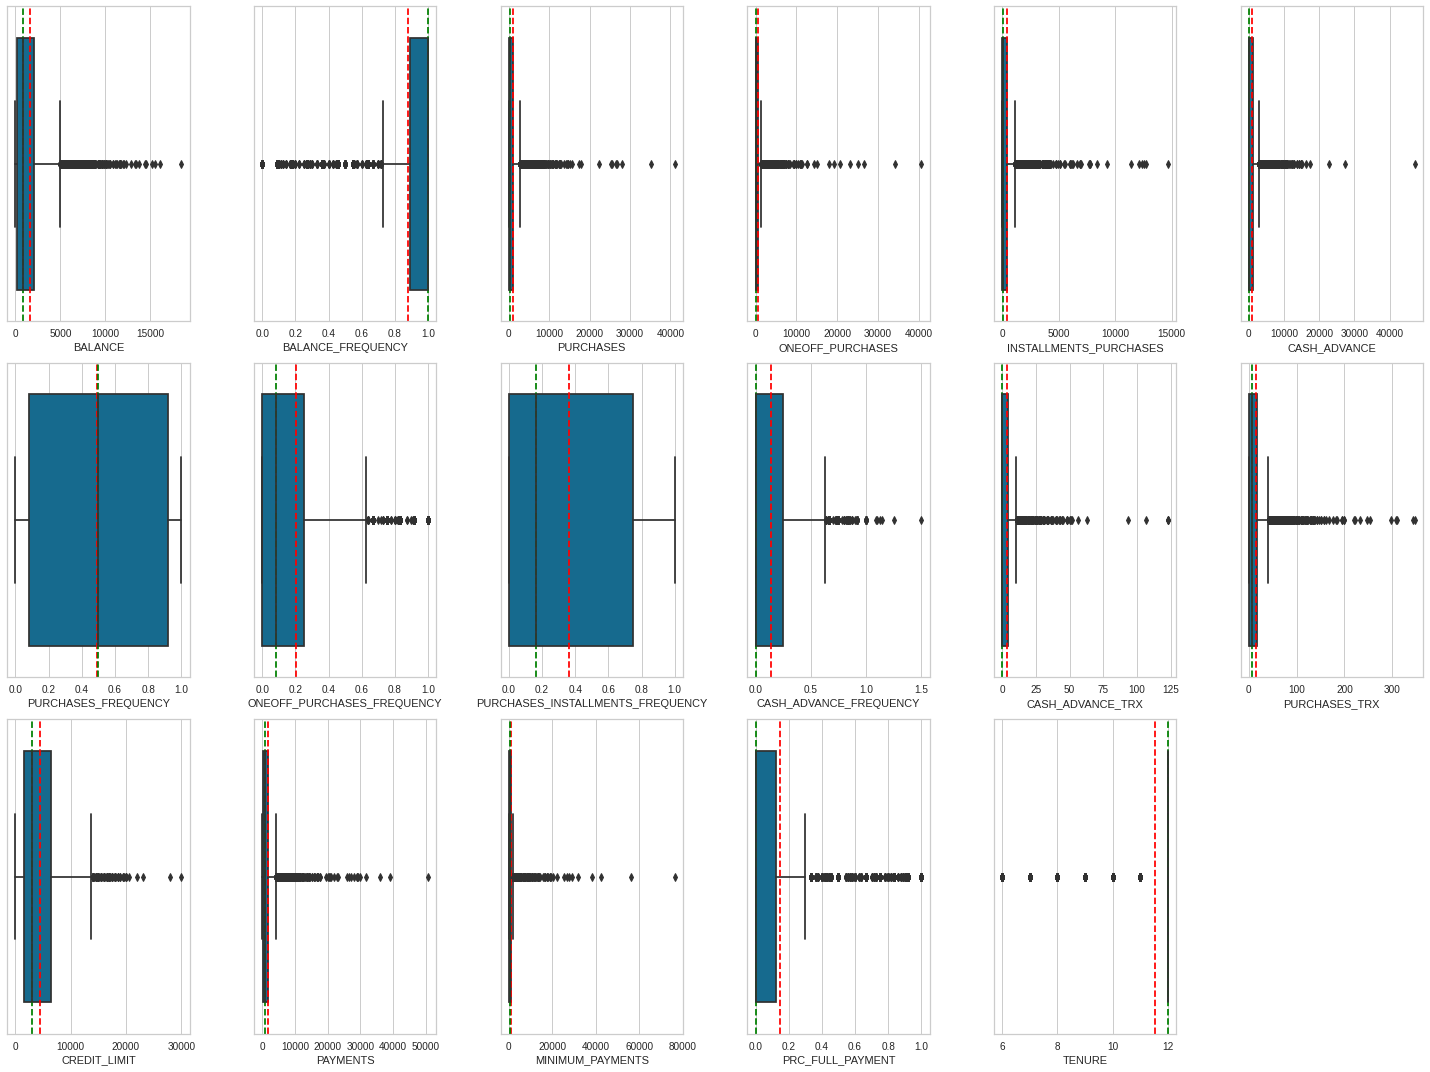

In [26]:
# membuat fungsi untuk menampilkan grafik displot
def boxplot(df, col, axes):
    sns.boxplot(data_train[col], ax = axes)
    axes.axvline(data_train[col].mean(), linestyle = '--', color = "red")
    axes.axvline(data_train[col].median(), linestyle = '--', color = "green")

fig, axes = plt.subplots(3,6, figsize = (20,15))

# menampilkan distplot tiap kolom numerik untuk analisis korelasi
axes = np.ravel(axes)
for i in range(len(numeric_columns)):
    boxplot(data_train, numeric_columns[i], axes[i])
for i in range(len(numeric_columns), 3*6):
    axes[i].axis("off")
axes = np.reshape(axes, (3, 6))
plt.tight_layout()
plt.show()

Dari plotting boxplot, dataset ini terlihat seperti mempunyai banyak outlier. Akan tetapi seperti yang sudah saya jelaskan sebelumnya, outlier ini merupakan data natural dan ada keterkaitan antarkolom sehingga terlihat semuanya memiliki outlier. Karena natural, saya akan membiarkan datanya seperti itu.

## 5.5. Feature Scaling

Karena datanya terdistribusi skewed, saya akan menggunakan MinMaxSCaler.

In [27]:
# Feature scaling using MinMaxSCaler

scaler = MinMaxScaler()
scaler.fit(data_train) # .fit hanya milik train

data_train_scaled = scaler.transform(data_train)

data_train_scaled

array([[2.07248945e-04, 1.25000000e-01, 1.09621344e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       [0.00000000e+00, 0.00000000e+00, 4.28814336e-03, ...,
        0.00000000e+00, 0.00000000e+00, 3.33333333e-01],
       [4.09809063e-02, 8.75000000e-01, 3.83431099e-03, ...,
        3.45338225e-02, 0.00000000e+00, 3.33333333e-01],
       ...,
       [7.15208780e-02, 1.00000000e+00, 0.00000000e+00, ...,
        4.09437322e-03, 0.00000000e+00, 8.33333333e-01],
       [5.73322114e-02, 1.00000000e+00, 0.00000000e+00, ...,
        3.62646891e-03, 0.00000000e+00, 8.33333333e-01],
       [1.86405521e-01, 1.00000000e+00, 4.99386120e-03, ...,
        1.07039034e-02, 0.00000000e+00, 8.33333333e-01]])

In [28]:
data_train.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [29]:
# Display as DataFrame

data_train_scaled_df = pd.DataFrame(data_train_scaled)
data_train_scaled_df.columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']
data_train_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.000207,0.125,0.001096,0.001108,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.015025,0.000000,0.000000,0.0,0.333333
1,0.000000,0.000,0.004288,0.004333,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.232053,0.000000,0.000000,0.0,0.333333
2,0.040981,0.875,0.003834,0.003875,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.017291,0.038397,0.029464,0.034534,0.0,0.333333
3,0.014304,0.375,0.028014,0.028308,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.038397,0.059726,0.001118,0.0,0.333333
4,0.023823,1.000,0.014616,0.014770,0.0,0.0,0.125,0.125,0.0,0.0,0.0,0.002882,0.031720,0.004245,0.001804,0.0,0.333333


## 5.6. Dimensionality Reduction

Saya akan melihat nilai VIF Score dan menggunakan metode Elbow sebagai pertimbangan dalam melakukan dimensionality reduction

### 5.6.1. VIF Score

In [30]:
# Melihat nilai VIF Score awal
vif = pd.DataFrame()
vif["fitur"] = data_train.columns

vif["VIF Score"] = [variance_inflation_factor(data_train.values, i) for i in range(len(data_train.columns))]

vif.sort_values(by='VIF Score')

,fitur,VIF Score
14,MINIMUM_PAYMENTS,1.385868
15,PRC_FULL_PAYMENT,1.707137
13,PAYMENTS,3.541505
5,CASH_ADVANCE,3.551766
10,CASH_ADVANCE_TRX,3.729632
0,BALANCE,4.150688
11,PURCHASES_TRX,4.276174
12,CREDIT_LIMIT,4.600072
9,CASH_ADVANCE_FREQUENCY,4.787429
7,ONEOFF_PURCHASES_FREQUENCY,5.631919


- VIF < 5 = independent
- VIF > 5 = dependent

- Kolom yang dependent tidak akan digunakan sebagai fitur.

- **Kolom yang digunakan sebagai fitur** : 'BALANCE', 'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', dan 'PRC_FULL_PAYMENT'.


In [31]:
data_train_scaled_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [32]:
# Menghapus kolom dependen
data_train_ind = data_train_scaled_df.drop(['TENURE','PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES'],axis=1)

In [33]:
# Melihat nilai VIF Score akhir
vif = pd.DataFrame()
vif["fitur"] = data_train_ind.columns

vif["VIF Score"] = [variance_inflation_factor(data_train_ind.values, i) for i in range(len(data_train_ind.columns))]

vif.sort_values(by='VIF Score')

,fitur,VIF Score
10,MINIMUM_PAYMENTS,1.360274
11,PRC_FULL_PAYMENT,1.678601
4,ONEOFF_PURCHASES_FREQUENCY,2.428679
3,PURCHASES_FREQUENCY,3.251183
7,PURCHASES_TRX,3.302381
9,PAYMENTS,3.465931
2,CASH_ADVANCE,3.498472
6,CASH_ADVANCE_TRX,3.693255
8,CREDIT_LIMIT,3.814185
0,BALANCE,3.889952


- sebelum didrop, nilai VIF kolom PURCHASES = 54219, setelah didrop multicoliinear kolomnya, nilai VIF kolom PURCHASES = 4.07
- sebelum didrop, nilai VIF kolom PURCHASES_FREQUENCY = 26.56, setelah didrop multicoliinear kolomnya, nilai VIF kolom PURCHASES_FREQUENCY = 3.25

### 5.6.2. PCA dan Elbow Method

In [34]:
pca = PCA(n_components=12)
pca.fit(data_train_ind)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [35]:
d

5

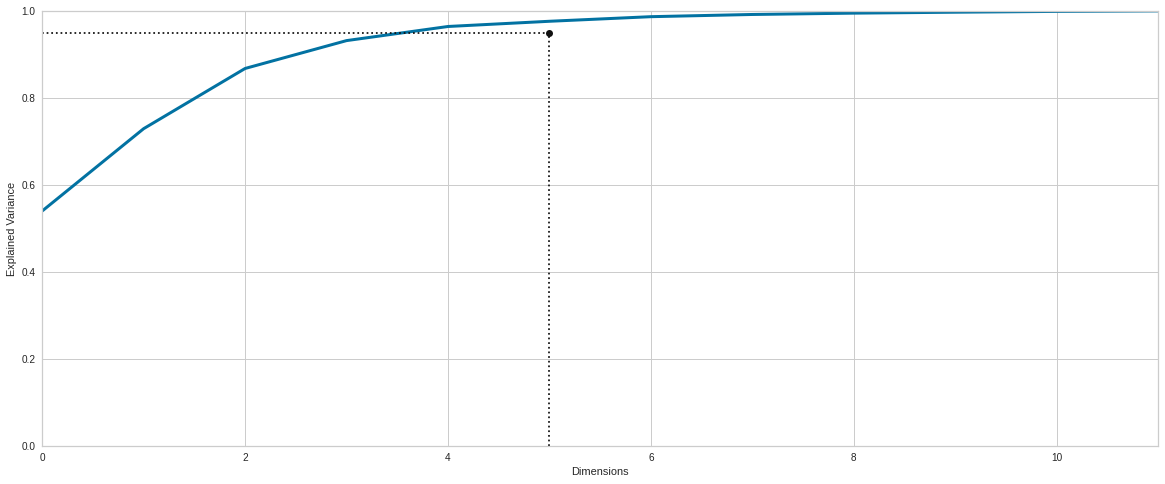

In [36]:
plt.figure(figsize=(20,8))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 11, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.grid(True)
plt.show()

patahan terbesar ada di 2 komponen. namun itu hanya mencakup 0.7 data dan itu kurang merepresentasikan data. maka saya akan gunakan 7 komponen dimana di titik itu dapat mencakup setidaknya 90% data.

In [37]:
pca = PCA(n_components=5)
pca.fit(data_train_ind)
data_train_reduced = pca.transform(data_train_ind)

# VI. Model Definition & Model Training

## 6.1. K-Means Clustering

### 6.1.1. KMeans Model Definition

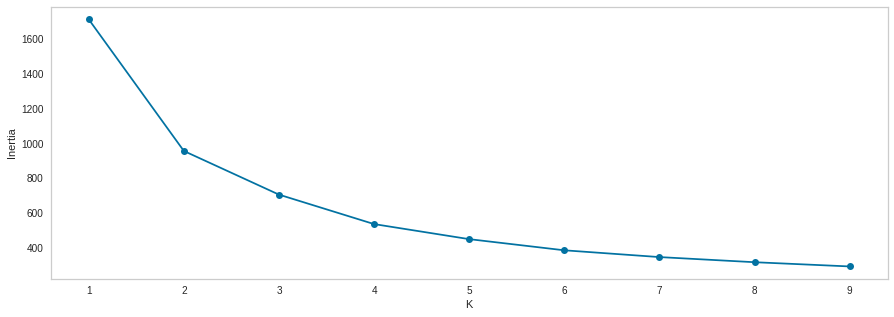

In [38]:
# Mencari parameter terbaik dengan elbow method
kmeans_model = [KMeans(n_clusters=k, random_state=5).fit(data_train_reduced) for k in range (1, 10)]
Kmeans_inertia = [model.inertia_ for model in kmeans_model]

plt.figure(figsize=(15, 5))
plt.plot(range(1,10), Kmeans_inertia, marker='o')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.grid()
plt.show()

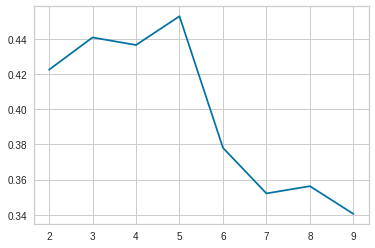

In [39]:
# Mencari parameter terbaik dengan silhouette score
silh = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(data_train_reduced)
    silh.append([k, silhouette_score(data_train_reduced, kmeans.labels_)])

plt.plot(pd.DataFrame(silh)[0], pd.DataFrame(silh)[1])
plt.show()

Berdasarkan elbow method, k terbaik adalah 2 yaitu jumlah k terkecil dan inertia paling kecil. Namun berdasarkan silhouette score, k dengan nilai silhouette score tinggi yang dekat dengan k=2 adalah k=3. Saya akan memakai k=3.

### 6.1.2. KMeans Model Training

In [40]:
Kmeans_model = KMeans(n_clusters=3, random_state=17)
Kmeans_model.fit(data_train_reduced)

KMeans(n_clusters=3, random_state=17)

In [41]:
Kmeans_model.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [42]:
label  = pd.DataFrame(Kmeans_model.labels_, columns= ['label'])
label.value_counts()

label
1        2181
2        1653
0         631
dtype: int64

In [43]:
df_kmean = pd.concat([data, label], axis =1)
df_kmean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,3091,3.833185,0.125,45.00,45.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,500.0,0.000000,NaN,0.0,8,1.0
1,5069,0.000000,0.000,176.03,176.03,0.0,0.0,0.125,0.125,0.0,0.0,0,1,7000.0,0.000000,NaN,0.0,8,1.0
2,6075,757.964752,0.875,157.40,157.40,0.0,0.0,0.125,0.125,0.0,0.0,0,6,1200.0,1494.480376,2638.598410,0.0,8,1.0
3,6291,264.566591,0.375,1150.00,1150.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1200.0,3029.380326,85.428885,0.0,8,1.0
4,7755,440.613643,1.000,600.00,600.00,0.0,0.0,0.125,0.125,0.0,0.0,0,1,1000.0,215.316424,137.846006,0.0,8,1.0


In [44]:
df_kmean.label.value_counts()

1.0    2181
2.0    1653
0.0     631
Name: label, dtype: int64

## 6.2. Agglomerative Clustering

### 6.2.1. Agglomerative Model Definition

In [45]:
agg = AgglomerativeClustering()

In [46]:
# Mencari parameter terbaik
linkages = ["ward", "single", "average"]
silhouette_agg = []
for i in range(2,11):
  for lk in linkages:
    agg = AgglomerativeClustering(n_clusters=i, affinity='euclidean', linkage=lk)
    agg.fit(data_train_reduced)
    sil_agg=silhouette_score(data_train_reduced, agg.labels_)
    silhouette_agg.append((i, lk, sil_agg))
pd.DataFrame(silhouette_agg, columns=['n_cluster','linkage','silhouette_score']).sort_values(by='silhouette_score')

,n_cluster,linkage,silhouette_score
25,10,single,0.112317
22,9,single,0.142343
19,8,single,0.144023
16,7,single,0.153012
13,6,single,0.175637
10,5,single,0.210927
24,10,ward,0.237021
21,9,ward,0.261986
20,8,average,0.277255
18,8,ward,0.279722


parameter terbaik Agglomerative Clustering :
- n_cluster = 2
- linkage = single

In [47]:
agg_mod = AgglomerativeClustering(n_clusters = 2, linkage = 'single')
agg_mod.fit(data_train_reduced)

AgglomerativeClustering(linkage='single')

In [48]:
lab_agg  = pd.DataFrame(agg_mod.labels_, columns= ['label'])
lab_agg.value_counts()

label
0        4464
1           1
dtype: int64

akan tetapi, setelah dicoba ternyata hasil clustering tidak seimbang atau gagal membagi data dengan rata. Maka saya akan coba parameter lainnya

### 6.2.2. Agglomerative Model Training

In [49]:
agg_model = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
agg_model.fit(data_train_reduced)

AgglomerativeClustering(n_clusters=3)

In [50]:
label_agg  = pd.DataFrame(agg_model.labels_, columns= ['label'])
label_agg.value_counts()

label
1        1993
0        1687
2         785
dtype: int64

hasil clustering lebih seimbang dengan n_cluster = 3 dan linkages = ward

## 6.3. DBSCAN Clustering

### 6.3.1. DBSCAN Model Definition

In [51]:
dbs_model = DBSCAN()

ketika dilakukan pencarian parameter terbaik dari DBSCAN model, muncul error `ValueError: Number of labels is 4465. Valid values are 2 to n_samples - 1 (inclusive)`. Ternyata hal tersebut disebabkan karena memang parameter terbaik DBSCAN tidak bisa dicari menggunakan elbow method dan silhouette. Maka saya mencoba untuk eksplorasi parameternya dengan beberapa nilai.

### 6.3.2. DBSCAN Model Training

In [52]:
dbs_model = DBSCAN()
dbs_model.fit(data_train_reduced)

DBSCAN()

In [53]:
dbs_model1 = DBSCAN(eps=0.1,min_samples=2)
dbs_model1.fit(data_train_reduced)

DBSCAN(eps=0.1, min_samples=2)

In [54]:
dbs_model2 = DBSCAN(eps=0.1,min_samples=4)
dbs_model2.fit(data_train_reduced)

DBSCAN(eps=0.1, min_samples=4)

In [55]:
dbs_model3 = DBSCAN(eps=0.2,min_samples=2)
dbs_model3.fit(data_train_reduced)

DBSCAN(eps=0.2, min_samples=2)

In [56]:
dbs_model4 = DBSCAN(eps=0.2,min_samples=4)
dbs_model4.fit(data_train_reduced)

DBSCAN(eps=0.2, min_samples=4)

In [57]:
dbs_model5 = DBSCAN(eps=0.05,min_samples=2)
dbs_model5.fit(data_train_reduced)

DBSCAN(eps=0.05, min_samples=2)

# VII. Model Evaluation

Evaluasi model dilakukan dengan terlebih dahulu melihat visualisasi clusteringnya. Untuk visualisasi hanya bisa memuat 2D. Maka saya akan membuat clustering 2 Dimensi hanya untk melihat visualisasinya saja.

## 7.1. KMeans Clustering Evaluation

In [58]:
vis_eval = PCA(n_components=2).fit_transform(data_train_reduced)

Text(0.5, 1.0, 'KMeans')

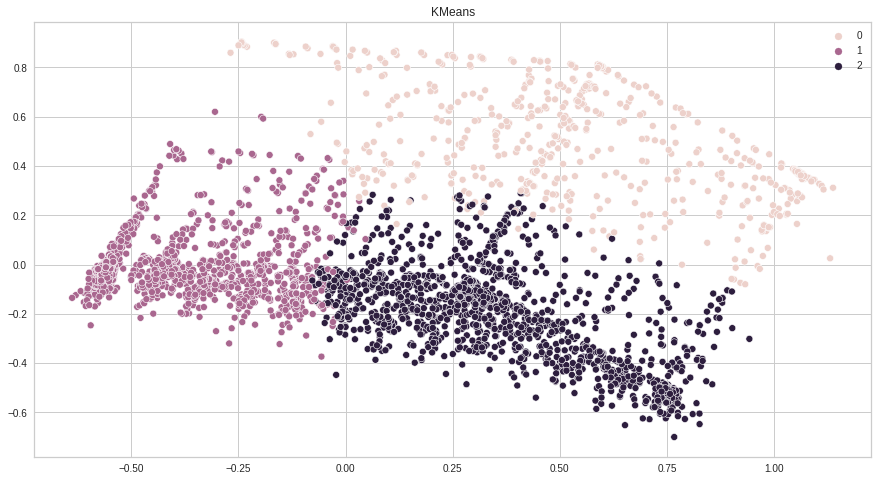

In [59]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=Kmeans_model.labels_).set_title('KMeans')

Clustering model KMeans dengan parameter n_clusters=3 dan random_state=17 menghasilkan kelas cluster yang terbagi cukup merata. Overlap data sangat sedikit dan pattern pembagian kelasnya juga sudah terlihat bagus.

## 7.2. Agglomerative Clustering Evaluation

Text(0.5, 1.0, 'Agglomerative Clustering')

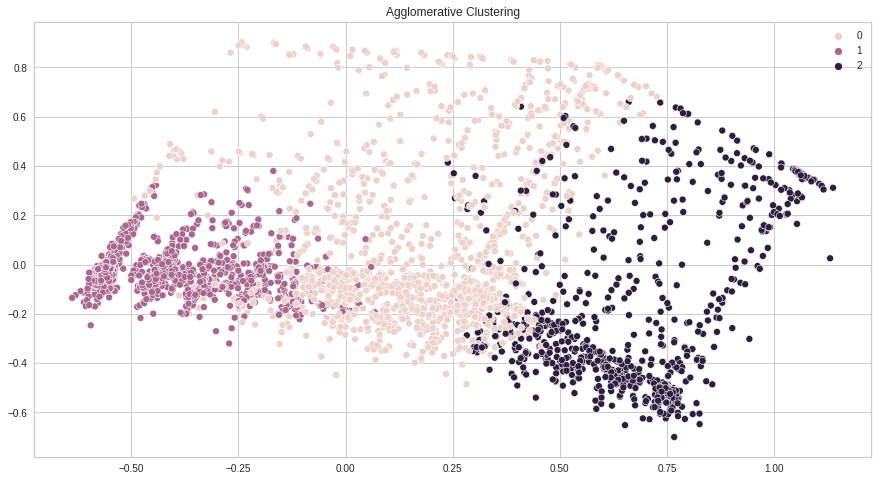

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=agg_model.labels_).set_title('Agglomerative Clustering')

Clustering model Agglomerative dengan parameter n_clusters = 3 dan linkage = 'ward' menghasilkan kelas cluster yang terbagi cukup merata. Pattern pembagian kelasnya juga sudah terlihat bagus, namun overlap data terlihat lebih banyak daripada model Kmeans.

## 7.3. DBSCAN Clustering Evaluation

Text(0.5, 1.0, 'eps=0.05, min_samples=2')

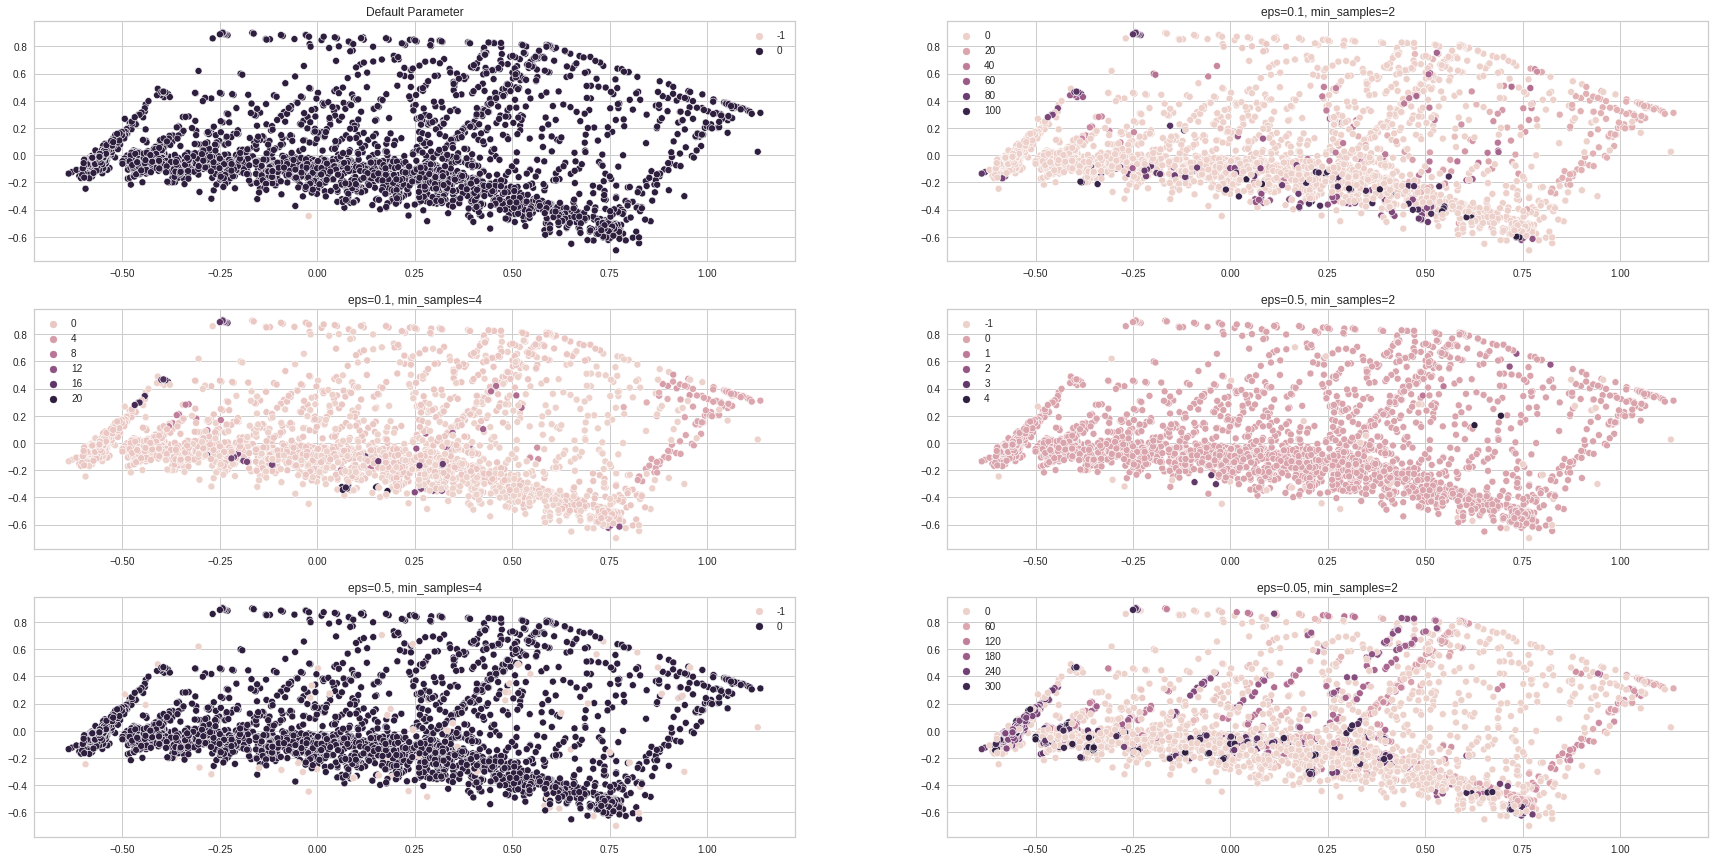

In [61]:
plt.figure(figsize=(30,15))
plt.subplot(3,2,1)
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=dbs_model.labels_).set_title('DBSCAN')
plt.title('Default Parameter')

plt.subplot(3,2,2)
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=dbs_model1.labels_).set_title('DBSCAN')
plt.title('eps=0.1, min_samples=2')

plt.subplot(3,2,3)
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=dbs_model2.labels_).set_title('DBSCAN')
plt.title('eps=0.1, min_samples=4')

plt.subplot(3,2,4)
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=dbs_model3.labels_).set_title('DBSCAN')
plt.title('eps=0.5, min_samples=2')

plt.subplot(3,2,5)
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=dbs_model4.labels_).set_title('DBSCAN')
plt.title('eps=0.5, min_samples=4')

plt.subplot(3,2,6)
sns.scatterplot(x=vis_eval[:,0],y=vis_eval[:,1],hue=dbs_model5.labels_).set_title('DBSCAN')
plt.title('eps=0.05, min_samples=2')

- Clustering DBSCAN dengan parameter default menghasilkan kelas cluster yang sangat buruk dimana hanya ada 1 kelas saja.
-  Clustering DBSCAN dengan parameter epsilon=0.1 dan min_samples = 2 atau 4 menghasilkan 6 kelas cluster. Min_samples =2 menghasilkan distribusi yang lebih merata daripada min_samples=4. Akan tetapi modelnya tetap saja buruk.
- Clustering DBSCAN dengan parameter epsilon=0.5 dengan min_samples = 2 atau 4 menghasilkan kelas cluster yang tidak terdistribusi secara merata.
- Clustering DBSCAN dengan parameter epsilon=0.05 dengan min_samples = 2 menghasilkan dsitribusi paling merata, namun overlap kelas cluster sangat tinggi.

# VIII. EDA Clustering

EDA Clustering saya lakukan untuk hasil dari algoritma terbaik yaitu kmeans.

In [62]:
# Menghitung banyak data di tiap cluster
df_kmean['label'].value_counts()

1.0    2181
2.0    1653
0.0     631
Name: label, dtype: int64

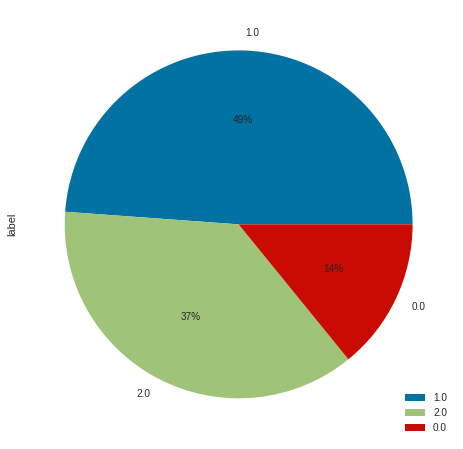

In [63]:
df_kmean['label'].value_counts().plot(kind='pie',legend=True,autopct='%1.0f%%', figsize=(15,8))

proporsi cluster dengan algoritma KMeans cukup merata dengan cluster 0 sebanyak 4%, cluster 1 sebanyak 49% dan cluster 2 sebanyak 37%.

<Figure size 2160x1440 with 0 Axes>

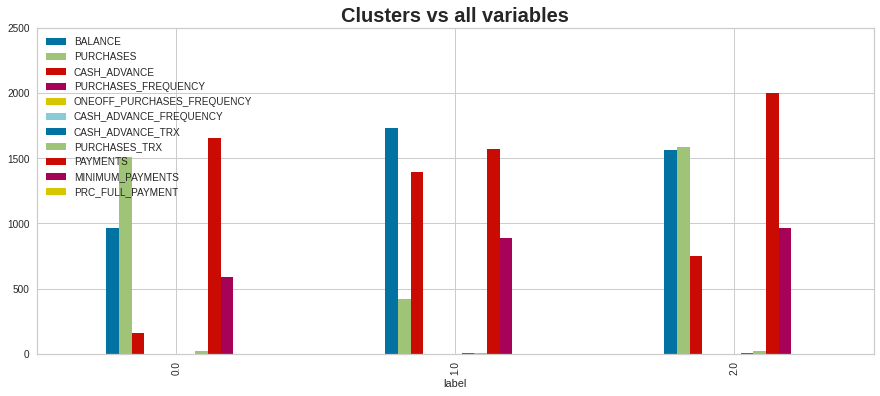

In [64]:
plt.figure(figsize=(30,20))
df_kmean.drop(['CUST_ID','TENURE','PURCHASES_INSTALLMENTS_FREQUENCY','BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES','CREDIT_LIMIT'], axis = 1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,2500])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

In [65]:
# Membuat list kolom yang tidak akan ditampilkan
listuse = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS','label']
listdrop = df_kmean
listdrop = listdrop.drop(listuse, axis=1)

<Figure size 2160x1440 with 0 Axes>

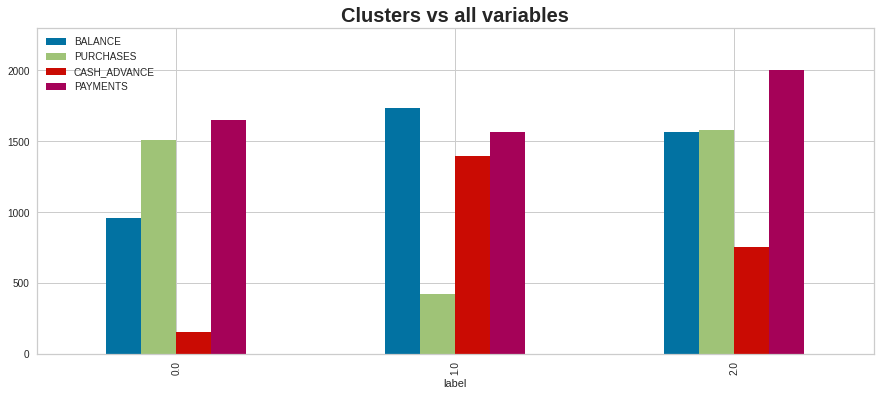

In [66]:
plt.figure(figsize=(30,20))
df_kmean.drop(listdrop, axis=1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,2300])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

In [67]:
# Membuat list kolom yang tidak akan ditampilkan
listuse2 = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','label']
listdrop2 = df_kmean
listdrop2 = listdrop2.drop(listuse2, axis=1)

<Figure size 2160x1440 with 0 Axes>

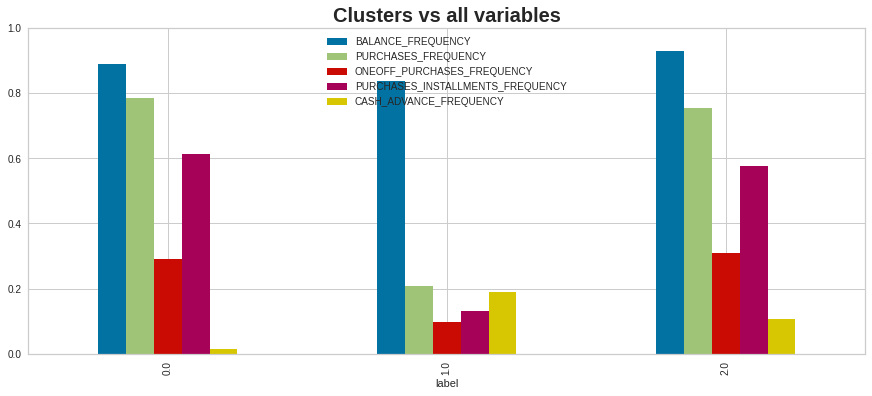

In [68]:
plt.figure(figsize=(30,20))
df_kmean.drop(listdrop2, axis=1).groupby('label').mean().plot.bar(figsize=(15,6))
plt.ylim([0,1])
plt.title("Clusters vs all variables",fontweight="bold", size=20)

plt.show()

**cluster 1**
- customer yang paling banyak melakukan cash advance,
- Sangat jarang melakukan pembelian/purchase dan menjaga purchase amountnya tetap rendah
- Sangat jarang melakukan pembayaran dengan cicilan (installments).
- cluster yang paling banyak remaining balance nya sehingga karakternya suka menumpuk tagihan karena purchase amount nya rendah.

**cluster 2**
- customer yang jarang melakukan cash advance
- sering melakukan pembelian/purchase dengan purchase amount yang tinggi
- sering melakukan pembayaran dengan cicilan (installments)
- remaining balance lumayan tinggi

**cluster 0**
- customer yang jarang melakukan cash advance
- sangat sering melakukan pembelian/purchase dengan purchase amount yang tinggi
- sangat sering melakukan pembayaran dengan cicilan (installments)
- remaining balance paling rendah, berarti walaupun sering melakukan cicilan cluster ini rajin mwmbayar tagihan sehingga remaining balance nya rendah.

ketiga cluster sangat jarang melakukan pembayaran sekali atau OneOff.

Segementasi customer berdasarkan analisis di atas :
- **Classic Customer (cluster 1, 49%)** = jarang menggunakan kartu kredit
- **Loyal Customer (Cluster 2, 37%)** = agak sering menggunakan kartu kredit dan rajin membayar tagihan
- **Priority Customer (Cluster 0, 4%)** = sangat sering menggunkan kartu kredit dan rajin membayar tagihan

# IX. Model Inference

## 9.1. Preprocessing inference data

In [69]:
data_inf

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,341.149186,1.000000,48.78,48.78,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,500.0,256.731955,259.351800,0.000000,12
1,1155.338824,0.909091,5744.03,4055.80,1688.23,0.000000,0.500000,0.083333,0.416667,0.000000,0,11,6000.0,3684.789911,328.151043,0.000000,12
2,117.777688,0.727273,853.30,853.30,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0,3,2000.0,851.921672,73.600798,0.000000,12
3,109.594389,1.000000,177.00,177.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1950.0,170.471030,221.171027,0.000000,12
4,2996.761878,1.000000,3644.35,3610.60,33.75,0.000000,0.666667,0.583333,0.083333,0.000000,0,23,3500.0,3879.940821,864.045134,0.000000,12
5,84.366783,0.909091,776.92,776.92,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,10,3000.0,752.509422,166.421449,1.000000,12
6,1023.323593,1.000000,253.37,196.37,57.00,0.000000,0.916667,0.500000,0.500000,0.000000,0,16,1200.0,463.956486,250.187987,0.000000,12
7,15.008041,1.000000,108.95,49.80,59.15,0.000000,0.500000,0.083333,0.333333,0.000000,0,6,1500.0,149.853315,131.972396,0.111111,12
8,1425.003265,1.000000,562.42,0.00,562.42,1814.910939,0.750000,0.000000,0.666667,0.416667,7,19,1800.0,985.544048,883.852995,0.000000,12
9,1346.777622,1.000000,1798.15,357.80,1440.35,0.000000,1.000000,0.250000,1.000000,0.000000,0,40,1500.0,1213.489835,712.170112,0.000000,12


In [70]:
# Melihat apakah ada missing value
data_inf.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [71]:
# Feature Scaling

data_inf_scaled = scaler.transform(data_inf)
data_inf_scaled

array([[1.84449248e-02, 1.00000000e+00, 1.18829536e-03, 1.20076625e-03,
        0.00000000e+00, 0.00000000e+00, 8.33330000e-02, 8.33330000e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.88184438e-03,
        1.50250417e-02, 5.06160187e-03, 3.39438127e-03, 0.00000000e+00,
        1.00000000e+00],
       [6.24657439e-02, 9.09091000e-01, 1.39926286e-01, 9.98373870e-02,
        1.14954276e-01, 0.00000000e+00, 5.00000000e-01, 8.33330000e-02,
        4.16667000e-01, 0.00000000e+00, 0.00000000e+00, 3.17002882e-02,
        1.98664441e-01, 7.26475187e-02, 4.29482176e-03, 0.00000000e+00,
        1.00000000e+00],
       [6.36789031e-03, 7.27273000e-01, 2.07866428e-02, 2.10047937e-02,
        0.00000000e+00, 0.00000000e+00, 2.50000000e-01, 2.50000000e-01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.64553314e-03,
        6.51085142e-02, 1.67960717e-02, 9.63282963e-04, 0.00000000e+00,
        1.00000000e+00],
       [5.92544360e-03, 1.00000000e+00, 4.31177285e-03, 4.357

In [72]:
# Display as DataFrame

data_inf_scaled_df = pd.DataFrame(data_inf_scaled)
data_inf_scaled_df.columns = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE']
data_inf_scaled_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.018445,1.000000,0.001188,0.001201,0.000000,0.0,0.083333,0.083333,0.000000,0.0,0.0,0.002882,0.015025,0.005062,0.003394,0.0,1.0
1,0.062466,0.909091,0.139926,0.099837,0.114954,0.0,0.500000,0.083333,0.416667,0.0,0.0,0.031700,0.198664,0.072648,0.004295,0.0,1.0
2,0.006368,0.727273,0.020787,0.021005,0.000000,0.0,0.250000,0.250000,0.000000,0.0,0.0,0.008646,0.065109,0.016796,0.000963,0.0,1.0
3,0.005925,1.000000,0.004312,0.004357,0.000000,0.0,0.083333,0.083333,0.000000,0.0,0.0,0.002882,0.063439,0.003361,0.002895,0.0,1.0
4,0.162026,1.000000,0.088777,0.088878,0.002298,0.0,0.666667,0.583333,0.083333,0.0,0.0,0.066282,0.115192,0.076495,0.011309,0.0,1.0


In [73]:
# drop kolom yang tidak digunakan sebagai fitur
data_inf_ind = data_inf_scaled_df.drop(['TENURE','PURCHASES_INSTALLMENTS_FREQUENCY', 'BALANCE_FREQUENCY', 'INSTALLMENTS_PURCHASES', 'ONEOFF_PURCHASES'],axis=1)

In [74]:
pca = PCA(n_components=5)
pca.fit(data_inf_scaled_df)
data_inf_reduced = pca.transform(data_inf_scaled_df)

In [75]:
data_inf_reduced_df = pd.DataFrame(data_inf_reduced)
data_inf_reduced_df

,0,1,2,3,4
0,-0.588678,-0.129227,-0.046720,-0.069991,-0.059841
1,-0.010532,-0.241932,-0.045242,0.194941,0.061164
2,-0.452874,0.006964,0.082070,0.106458,0.022413
3,-0.588982,-0.128051,-0.047422,-0.049227,-0.048233
4,-0.006512,0.210829,0.370078,-0.030097,0.079599
5,0.191007,1.096655,-0.185637,0.009994,0.004209
6,0.419011,0.024087,0.220329,-0.072120,-0.057492
7,-0.060687,-0.131433,-0.137247,-0.036095,-0.055309
8,0.331618,-0.380770,-0.183047,-0.108700,0.168734
9,0.766629,-0.327122,-0.027162,0.054838,-0.115243


## 9.2. Inference KMeans Model

In [76]:
# Predict Data Inference

kmeans_inf = Kmeans_model.transform(data_inf_reduced_df)
kmeans_inf

array([[1.30267703, 0.25227034, 0.94188386],
       [0.95498663, 0.52276215, 0.41926955],
       [1.10488316, 0.12941411, 0.85145318],
       [1.30049477, 0.24543582, 0.94024162],
       [0.66665604, 0.56465382, 0.72631715],
       [0.74623665, 1.27890789, 1.295318  ],
       [0.51944109, 0.85359007, 0.41572049],
       [0.91255941, 0.42440374, 0.41430559],
       [0.98714509, 0.88761913, 0.28908831],
       [0.89000983, 1.23281352, 0.4703694 ]])

In [77]:
label  = pd.DataFrame(Kmeans_model.labels_, columns= ['label'])
label

,label
0,1
1,1
2,1
3,1
4,1
...,...
4460,1
4461,1
4462,1
4463,1


In [78]:
df_inf_kmean = pd.concat([data_inf, label], axis =1)
df_inf_kmean = df_inf_kmean.head(10)
df_inf_kmean

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,label
0,341.149186,1.000000,48.78,48.78,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,500.0,256.731955,259.351800,0.000000,12.0,1
1,1155.338824,0.909091,5744.03,4055.80,1688.23,0.000000,0.500000,0.083333,0.416667,0.000000,0.0,11.0,6000.0,3684.789911,328.151043,0.000000,12.0,1
2,117.777688,0.727273,853.30,853.30,0.00,0.000000,0.250000,0.250000,0.000000,0.000000,0.0,3.0,2000.0,851.921672,73.600798,0.000000,12.0,1
3,109.594389,1.000000,177.00,177.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1950.0,170.471030,221.171027,0.000000,12.0,1
4,2996.761878,1.000000,3644.35,3610.60,33.75,0.000000,0.666667,0.583333,0.083333,0.000000,0.0,23.0,3500.0,3879.940821,864.045134,0.000000,12.0,1
5,84.366783,0.909091,776.92,776.92,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0.0,10.0,3000.0,752.509422,166.421449,1.000000,12.0,1
6,1023.323593,1.000000,253.37,196.37,57.00,0.000000,0.916667,0.500000,0.500000,0.000000,0.0,16.0,1200.0,463.956486,250.187987,0.000000,12.0,1
7,15.008041,1.000000,108.95,49.80,59.15,0.000000,0.500000,0.083333,0.333333,0.000000,0.0,6.0,1500.0,149.853315,131.972396,0.111111,12.0,1
8,1425.003265,1.000000,562.42,0.00,562.42,1814.910939,0.750000,0.000000,0.666667,0.416667,7.0,19.0,1800.0,985.544048,883.852995,0.000000,12.0,1
9,1346.777622,1.000000,1798.15,357.80,1440.35,0.000000,1.000000,0.250000,1.000000,0.000000,0.0,40.0,1500.0,1213.489835,712.170112,0.000000,12.0,1


In [79]:
df_inf_kmean['label'].value_counts()

1    10
Name: label, dtype: int64

clustering Kmeans pada data inference menghasilkan cluster 1 semua dimana kelas tersebut adalah classic customer yang jarang menggunakan kartu kredit.

# X. Kesimpulan

**Metrics Model**
- Evaluasi terhadap hasil clustering dilakukan dengan melihat visualisasi 2D nya.
- Clustering menggunakan algoritma KMeans (best parameter : n_clusters=3, random_state=17) menghasilkan kelas cluster yang terbagi cukup merata. Overlap data sangat sedikit dan pattern pembagian kelasnya juga sudah terlihat bagus.
- Clustering menggunakan algoritma Agglomerative (best parameter: n_clusters = 3, linkage = 'ward') menghasilkan kelas cluster yang terbagi cukup merata. Pattern pembagian kelasnya juga sudah terlihat bagus, namun overlap data terlihat lebih banyak daripada model Kmeans.
- Clustering menggunakan algoritma DBSCAN (no best parameter, all parameter resulting bad clustering) menghasilkan kelas cluster yang paling buruk karena gagal dalam membagi rata kelas cluster. Selain itu terdapat banyak overlap kelas di beberapa nilai parameter.
- Algoritma terbaik untuk dataset ini adalah KMeans dengan parameter n_clusters=3, random_state=17

**Analisis kelebihan dan kelemahan tiap model**

`KMeans Clustering`
- (+) mudah digunakan, mudah diaplikasikan ke data baru, menghasilkan cluster yang konvergen, dan mampu melakukan generalisasi ke kelompok dengan bentuk dan ukuran yang berbeda, seperti kelompok elips
- (-) harus mencari sendiri nilai k yang terbaik, kurang baik untuk data dengan dimensionality yang tinggi, cenderung membagi cluster dengan ukuran data yang sama sehingga jika ada minority data dengan behavior tertentu akan bias, dan hanya bisa digunakan untuk data numerical saja.

`Agglomerative Clustering`
- (+) mudah digunakan, kluster kecil dapat dibuat jika ada sekumpulan data dalam jumlah kecil dengan behaviour yang sama
- (-) hanya cocok untuk beberapa kasus saja, sangat sensitif terhadap outlier, dan tidak cocok untuk dataset yang sangat besar

`DBSCAN Clustering`
- (+) mudah digunakan, robust terhadap outlier, dapat membuat cluster dari kumpulan data berbentuk apapun, dapat menemukan cluster yang dikelilingi cluster lain
- (-) sensitif terhadap parameternya sendiri seperti eps dan min_samples, gagal mengidentifikasi cluster jika terdapat variasi kepadatan dataset dan jika kepadatan datanya renggang.

**Improvement Suggestion**
- Improvement yang dapat diterapkan untuk clustering adalah sebaiknya dilakukan pencarian parameter yang lebih mendalam lagi seperti k, n_clusters, dan lain2 agar hasil lebih bagus lagi.

**Insight setelah proses EDA dan selanjutnya**
- kolom yang terpilih sebagai fitur dari analisis VIF Score sesuai dengan analisis korelasi independen dan dependen fitur di EDA awal.
- Hasil segmentasi tipe customer credit card pada dataset ini adalah sebagai berikut : 
    1. **Classic Customer (cluster 1, 49%)** = jarang menggunakan kartu kredit
    2. **Loyal Customer (Cluster 2, 37%)** = agak sering menggunakan kartu kredit dan rajin membayar tagihan
    3. **Priority Customer (Cluster 0, 4%)** = sangat sering menggunkan kartu kredit dan rajin membayar tagihan

# XI. Conceptual Problems

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !
3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !

1. Inertia adalah ukuran seberapa baik kumpulan data dikelompokkan oleh K-Means. Inertia dihitung mengkuadratkan jarak antara setiap titik data dan centroidnya, dan menjumlahkan kuadrat ini di satu cluster. Semakin kecil nilai inertia nya, maka semakin baik. Akan tetapi juga harus dilihat dari nilai K nya. Model Kmeans yang bagus adalah dimana k nya terkecil dan inertianya terkecil yang bisa dicari dengan elbow method.

2. Elbow method adalah suatu metode untuk mencari nilai k optimum dari K-Means. Cara penggunaannya adalah dengan menempatkan jumlah k di sumbu x, dan besar inertia di sumbu y. Titik terbaik untuk menentukan K adalah dengan melihat elbow/patahan terbesarnya yang memiliki nilai k terkecil dan inertia terkecil. Kelebihannya adalah jika diaplikasikan pada kasus yang tepat, dapat langsung menunjukkan k terbaik dari elbownya. Akan tetapi kelemahannya terkadang elbow tersebut ambigu karena terdapat > 1 titik yang terindikasi sebagai elbow. Kelemahan lainnya adalah perhitungannya berdasarkan titik ke titik lain data saja, bukan ke centroid cluster sehingga terkadang k terbaik di elbow bukan k yang tepat untuk membagi cluster data.

3. Algoritma clustering :
- `Kmeans Clustering`
konsepnya adalah secara iterative memilih centroid secara acak, lalu menghitung jarak data ke centroid, dan iterative berhenti ektika sudah menemukan centroid yang tepat/optimal. Cluster data akan ditentukan dari jaraknya terhadap centroid terdekat.
- `Agglomerative Clustering`
konspenya adalah membangun nested cluster dengan menghubungkan titik data secara berurutan. Bentuk dari hirarki cluster seperti pohon yang disebut dendogram. Cluster paling atas ada 1 cluster yang berisi semua titik data. yang paling bawah adalah individual data. Ada beberapa cara untuk menautkan titik data yaitu Single linkage, Complete or Maximum linkage, Average linkage, dan Ward. Yang saya pakai adalah ward dimana konsepnya adalah meminimalkan jumlah perbedaan kuadrat dalam semua cluster tetapi dengan pendekatan hierarkis.
- `DBSCAN Clustering (Density-based spatial clustering)`
konsepnya adalah mengelompokkan titik-titik yang saling berdekatan dan menandai yang lain sebagai outlier yang terletak sendirian di daerah dengan kepadatan rendah. Densitas/kepadatan tersebut didefinisikan dengan parameternya yaitu min_samples (jumlah minimal titik yang dapat dijadikan cluster) dan eps/epsilon (jarak untuk menentukan wilayah titik dikatakan saling berdekatan)